In [1]:
import pandas as pd
import numpy as np
import requests
import xmltodict
import seaborn as sns
import matplotlib.pyplot as plt
import time
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Load bowtie2 output for "July 14th 2020" sample

In [2]:
df = pd.read_csv('03_July142020-ALL-R1-TaxaName.csv')

In [3]:
df.head(10)

,taxon_id,read_count
0,293939,1437
1,2014542,818
2,419435,510
3,54313,378
4,54,316
5,2107706,193
6,757,122
7,610243,74
8,1729650,69
9,482564,55


- taxon IDs are unique identifiers known across NCBI databese and generated as an intermediate output through bowtie2 bioinformatics tool

### Using NCBI API to retrieve taxon scientific name (generated through bowtie2 output) from taxon ID using NCBI API

In [4]:
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/{}"
db = "taxonomy"

In [5]:
def ncbi_fetch(tax_id):
    try:
        efetch = "efetch.fcgi?db={}&id={}".format(db, tax_id)
        efetch_response = requests.get(base_url.format(efetch))
        efetch_dict = xmltodict.parse(efetch_response.content)
        ScientificName = efetch_dict['TaxaSet']['Taxon']['ScientificName']
        time.sleep(1)
    except:
        ScientificName = tax_id
        pass
 
    return ScientificName

def enrich_dataset(df):
    taxon_value = df['taxon_id']
    ScientificName = ncbi_fetch(taxon_value)

    df['taxon_name'] = ScientificName

    return df

In [6]:
%%time
df = df.apply(enrich_dataset, axis=1)

CPU times: user 9.59 s, sys: 1.1 s, total: 10.7 s
Wall time: 9min


In [7]:
df.to_csv('SAMPLE_July142020-TaxaName.csv', index=False)

In [8]:
df = pd.read_csv('SAMPLE_July142020-TaxaName.csv')

In [9]:
df.head(20)

,taxon_id,read_count,taxon_name
0,293939,1437,Aspergillus lentulus
1,2014542,818,Alcanivorax sp. N3-2A
2,419435,510,Ichnoviriform fumiferanae
3,54313,378,Tychonema bourrellyi
4,54,316,Nannocystis exedens
5,2107706,193,filamentous cyanobacterium Phorm 6
6,757,122,[Pasteurella] mairii
7,610243,74,Asaia platycodi
8,1729650,69,Planktothrix sp. PCC 11201
9,482564,55,Oscillatoria nigro-viridis


### Visualize taxon name and their relative abundance in the sample

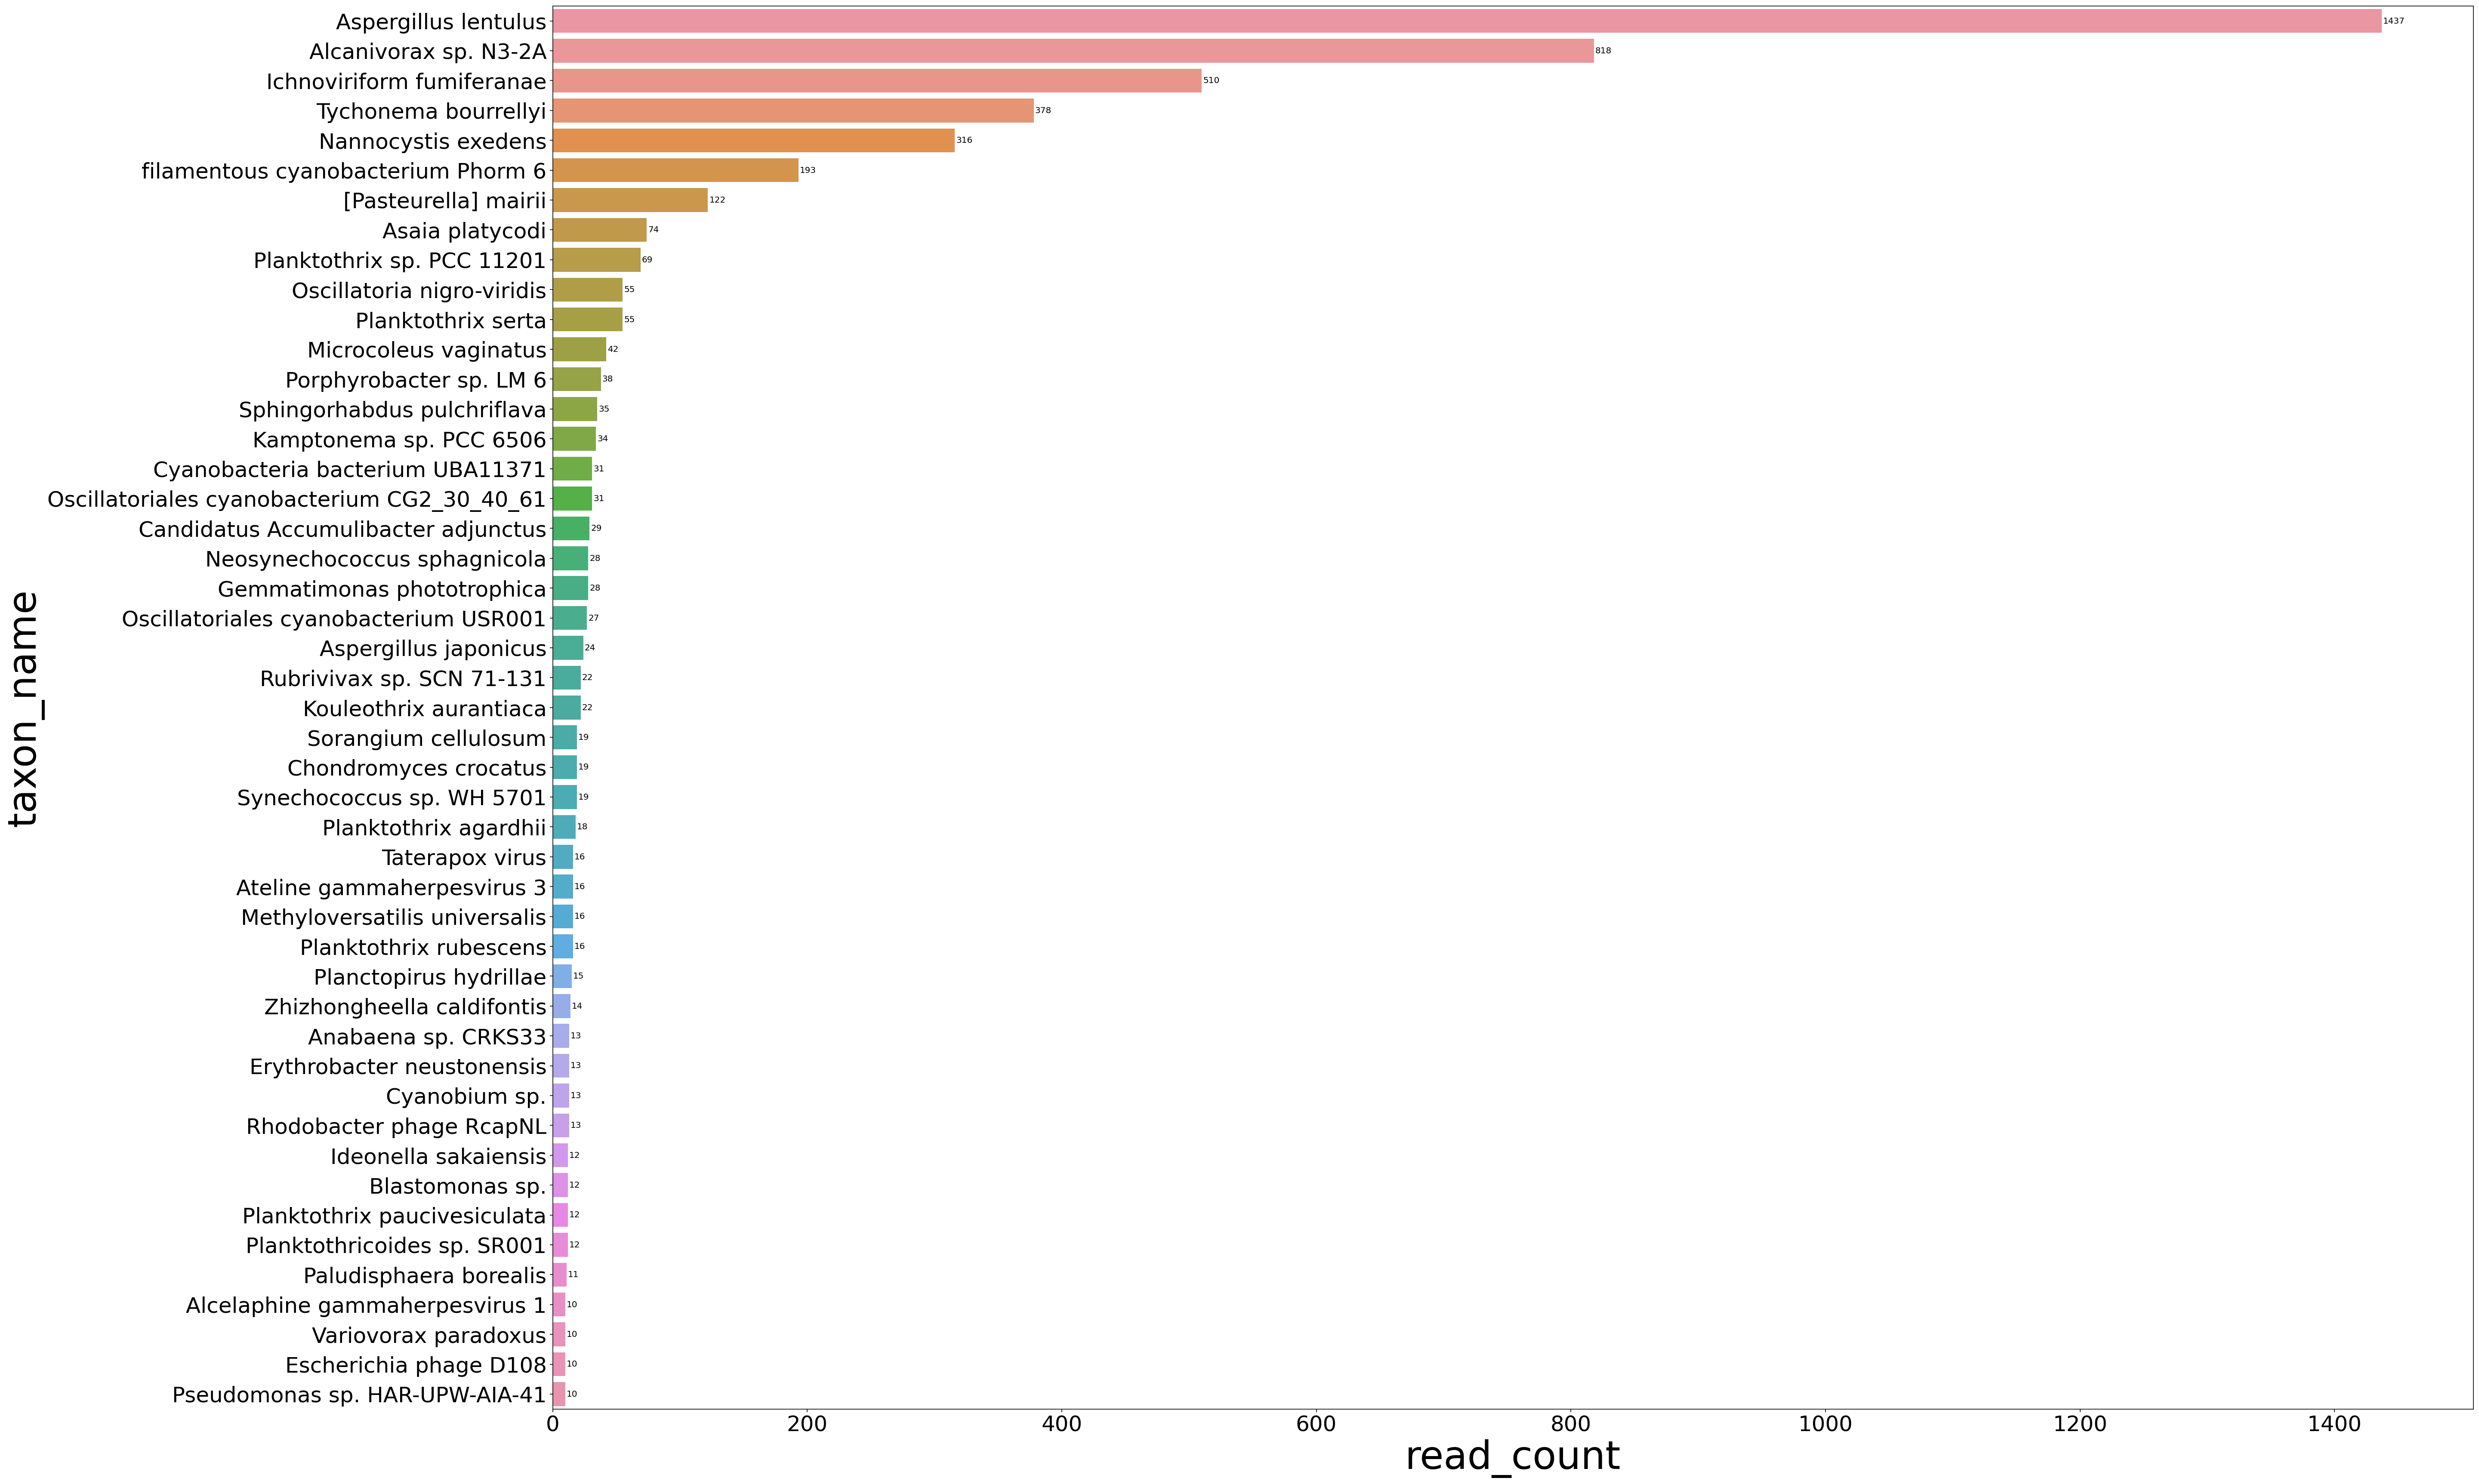

In [10]:
plt.figure(figsize = (40,30))
ax = sns.barplot(y='taxon_name', x='read_count', data=df[df['read_count'] >= 10])
ax.set_xlabel("read_count",fontsize=45)
ax.set_ylabel("taxon_name",fontsize=45)
ax.tick_params(axis='x', labelsize = 25)
ax.tick_params(axis='y', labelsize = 25)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')